F1-Score (accuracy metric used throughout project): 0.9230769230769231
ROC-AUC Score: 0.8482142857142856


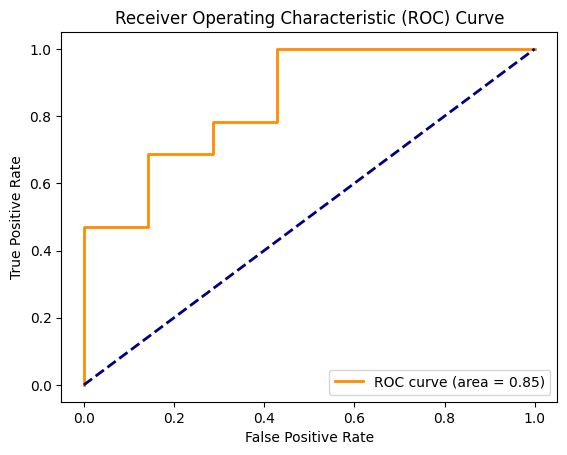

In [13]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv(r"C:\Users\bhatt\Dropbox\Aryan\Code\ParkinsonsResearchProj\parkinsons.data", delimiter=',')

# Split the data into features and target variable
X = df.drop(['name', 'status'], axis=1)  # Drop 'name' as it is not a feature, and 'status' is the target
y = df['status']  # 'status' is the target variable (1 for Parkinson's, 0 for healthy)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train a logistic regression model on the resampled data
model = LogisticRegression(max_iter=1000)
model.fit(X_resampled, y_resampled)

# Predict probabilities on the test set
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class

# Adjust the decision threshold (if needed)
threshold = 0.5  # Adjust this value as needed to optimize specific metrics
y_pred_adjusted = (y_prob >= threshold).astype(int)

# Evaluate the model using different metrics
f1 = classification_report(y_test, y_pred_adjusted, output_dict=True)['1']['f1-score']
roc_auc = roc_auc_score(y_test, y_prob)

print("F1-Score (accuracy metric used throughout project):", f1)
print("ROC-AUC Score:", roc_auc)

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
